## Tutorial : Creation of Sequence Logos

We often choose to view the sequence preference of a DNA-protein interaction in terms of sequence logo. The relative heights of the base pairs A, C, G, and T represent the relative probabilities of finding that base in that position in a naturally occuring binding site. 

The total height of the base pair stack at that position represents the information content of that position. This means that if each base occurs with a 25% probability, then the base stack will have height zero.

To show how we generate sequence logos from energy matrices we will first load in an energy matrix.

In [1]:
#Import basic stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

#add path to where all the code is
sys.path.append('../code/')
#import anylogo python file written by Justin Kinney.
import RNAseqplotlogo

In [2]:
#load in energy matrix
emat = pd.io.parsers.read_csv('/home/bill/test_fdoh/maoPhdfRdataset_alldone_with_largeMCMC195',delim_whitespace=True)

To convert energy matrices to sequence logos we must first convert the energy entries to probabilities. Probabilities are defined by what frequency of each base we would find in a large number of naturally occuring binding sites. 

In [3]:
bg_df = pd.DataFrame([0.25,0.25,0.25,0.25])

def effect_df_to_prob_df(effect_df,bg_df,beta):
    '''This function converts an energy matrix to a probability matrix. effect_df is the energy matrix.
    bg_df is a pandas data frame that describes the background probabilities of each base.'''
    prob_df = effect_df.copy()
    vals = effect_df.values
    #fix values so that the minimum value for each position is 0
    vals -= vals.min(axis=1)[:,np.newaxis]
    #We determine probabilities by assuming a boltzmann distribution. We can then determine statistical
    #weights of each of the 4 base pairs
    weights = np.exp(-beta*vals)*bg_df.values
    #we can then convert these weights to probabilities. 
    prob_df.loc[:,:] = weights/weights.sum(axis=1)[:,np.newaxis]
    return prob_df

We can now plot the logo with the following function based on anylogo (Justin Kinney 2017).

(array([ 61,  61,  61,  61,  83,  83,  83,  83, 148, 148, 148, 148]), array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]))


AssertionError: 

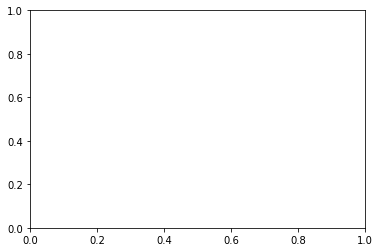

In [5]:
fig = RNAseqplotlogo.plot_logo(emat)